In [1]:
# %pip install pandas
import pandas as pd

In [2]:
#%pip install seaborn matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
kirb21_df = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")
kirb21_df.head()

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


In [4]:
kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == 'kirby906a_ax.img']
print(kirby906a_ax_df.head())

       Unnamed: 0             rawid              roi  volume   min    max  \
12540       12541  kirby906a_ax.img  Telencephalon_L  467063   2.0  350.0   
12541       12542  kirby906a_ax.img  Telencephalon_R  470488   2.0  337.0   
12542       12543  kirby906a_ax.img   Diencephalon_L    8801  60.0  327.0   
12543       12544  kirby906a_ax.img   Diencephalon_R    9054  63.0  415.0   
12544       12545  kirby906a_ax.img    Mesencephalon    9564  86.0  352.0   

           mean      std  type  level   id      icv      tbv  
12540  165.2599  57.1707     1      1  906  1195015  1123076  
12541  171.8695  59.3001     1      1  906  1195015  1123076  
12542  227.1878  31.2303     1      1  906  1195015  1123076  
12543  231.6770  31.1780     1      1  906  1195015  1123076  
12544  269.1003  28.6454     1      1  906  1195015  1123076  


In [5]:
t1l1 = kirby906a_ax_df.loc[(kirby906a_ax_df['type']==1) & (kirby906a_ax_df['level']==1)]
telencephalon_L_volume = t1l1.loc[t1l1['roi']=='Telencephalon_L']['volume'].sum()
print(telencephalon_L_volume)

telencephalon_R_volume = t1l1.loc[t1l1['roi']=='Telencephalon_R']['volume'].sum()
print(telencephalon_R_volume)

ICV_L_fraction = telencephalon_L_volume/t1l1.loc[t1l1['roi']=='Telencephalon_L']['icv'].iloc[0]
print(ICV_L_fraction)
ICV_R_fraction = telencephalon_R_volume/t1l1.loc[t1l1['roi']=='Telencephalon_R']['icv'].iloc[0]
print(ICV_R_fraction)
ICV_fraction = ICV_L_fraction + ICV_R_fraction
print(ICV_fraction)

TBV_L_fraction = telencephalon_L_volume/t1l1.loc[t1l1['roi']=='Telencephalon_L']['tbv'].iloc[0]
print(TBV_L_fraction)
TBV_R_fraction = telencephalon_R_volume/t1l1.loc[t1l1['roi']=='Telencephalon_R']['tbv'].iloc[0]
print(TBV_R_fraction)
TBV_fraction = TBV_L_fraction + TBV_R_fraction
print(TBV_fraction)

467063
470488
0.3908427927682916
0.3937088655790931
0.7845516583473847
0.4158783555164566
0.41892801555727305
0.8348063710737297


In [7]:
all_regions_df = kirby906a_ax_df.groupby(['roi','type','level'],as_index = False).agg(total_volume = ('volume','sum'))
#print(all_regions_df.columns)

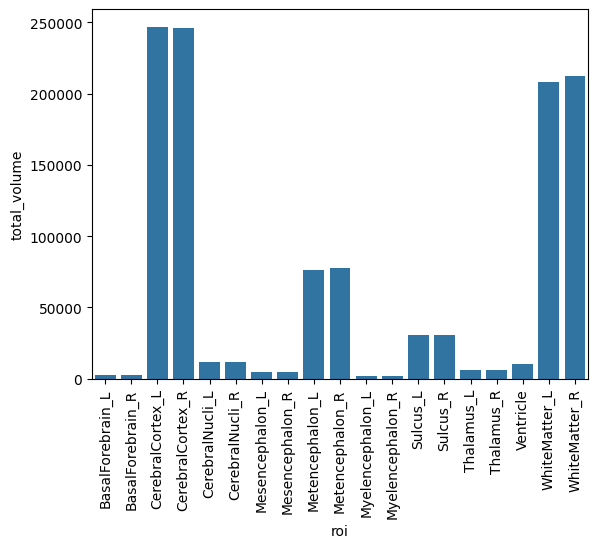

In [8]:
t1l2 = all_regions_df.loc[(all_regions_df['type']==1) & (all_regions_df['level']==2)]
sns.barplot(x = 'roi', y = 'total_volume',data = t1l2)
plt.xticks(rotation = 90)
plt.show()

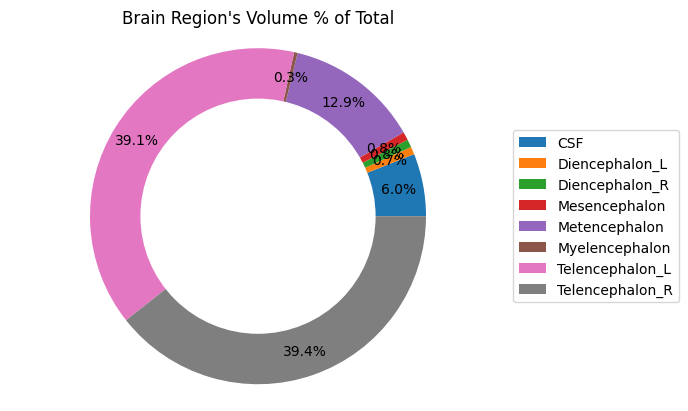

In [9]:
t1l3 = all_regions_df.loc[(all_regions_df['type']==1) & (all_regions_df['level']==1)]
#print(t1l3.columns)
# Pie Chart
plt.pie(t1l3['total_volume'], 
        autopct='%1.1f%%', pctdistance=0.85)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title("Brain Region's Volume % of Total")

# Displaying Chart and adding legend
plt.legend(
    t1l3['roi'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.axis('equal')
plt.show()

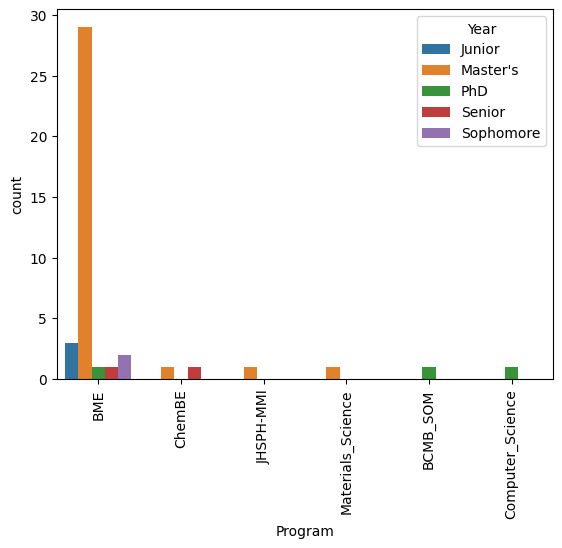

In [10]:
class_interests_df = pd.read_csv('https://raw.githubusercontent.com/bcaffo/ds4ph-bme/refs/heads/master/data/classInterests.txt',sep='\t')

#class_interests_df.head()

class_cts_df = class_interests_df.groupby(['Year','Program']).size().reset_index(name='count')

#class_cts_df.head()

sns.barplot(x = 'Program', y = 'count',hue='Year',data = class_cts_df)
plt.xticks(rotation = 90)
plt.show()


In [12]:
#part 1
gene_expression_df = pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/refs/heads/master/data/GSE5859_exprs.csv")
#gene_expression_df.head()

exprs_cols = gene_expression_df.columns.drop('Unnamed: 0')
gene_exprs_row_mean_df = gene_expression_df[exprs_cols].mean(axis=1)

#gene_exprs_row_mean_df.head()

gene_expression_df_pt1 = gene_expression_df.copy()
gene_expression_df_pt1[exprs_cols] = gene_expression_df[exprs_cols].sub(gene_exprs_row_mean_df,axis = 0)
print(gene_expression_df_pt1.head())

#part 2
gene_exprs_col_mean_df = gene_expression_df_pt1[exprs_cols].mean(axis = 0)
#print(gene_exprs_col_mean_df.head())
#print(gene_exprs_col_mean_df.shape)
#print(gene_expression_df.shape)

gene_expression_df_pt2 = gene_expression_df_pt1.copy()
gene_expression_df_pt2[exprs_cols] = gene_expression_df_pt1[exprs_cols].sub(gene_exprs_col_mean_df,axis = 1)
print(gene_expression_df_pt2.head())

#part 3
gene_exprs_std_df = gene_expression_df_pt2[exprs_cols].std(axis = 0)
#print(gene_exprs_std_df.head())
gene_expression_df_pt3 = gene_expression_df_pt2.copy()
gene_expression_df_pt3[exprs_cols] = gene_expression_df_pt2[exprs_cols].div(gene_exprs_std_df, axis = 1)
print(gene_expression_df_pt3.head())

  Unnamed: 0  GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  \
0  1007_s_at        -0.049313        -0.647073         -0.226509   
1    1053_at         0.163992         0.308363          0.400337   
2     117_at         0.283074        -0.651863         -0.437645   
3     121_at        -0.648591        -0.558832         -0.040375   
4  1255_g_at         0.400185        -0.088886         -0.069418   

   GSM136707.CEL.gz  GSM25553.CEL.gz  GSM136676.CEL.gz  GSM136711.CEL.gz  \
0          0.129747        -0.322250          0.123230          0.480163   
1         -0.085507         0.159365         -0.009050         -0.249394   
2         -0.062873        -0.271335         -0.176954         -0.377696   
3          0.375740        -0.360718          0.422774          0.518462   
4          0.167261        -0.071777         -0.010852          0.113335   

   GSM136542.CEL.gz  GSM136535.CEL.gz  ...  GSM48650.CEL.gz  GSM25687.CEL.gz  \
0         -0.013618          0.263058  ...         0.6

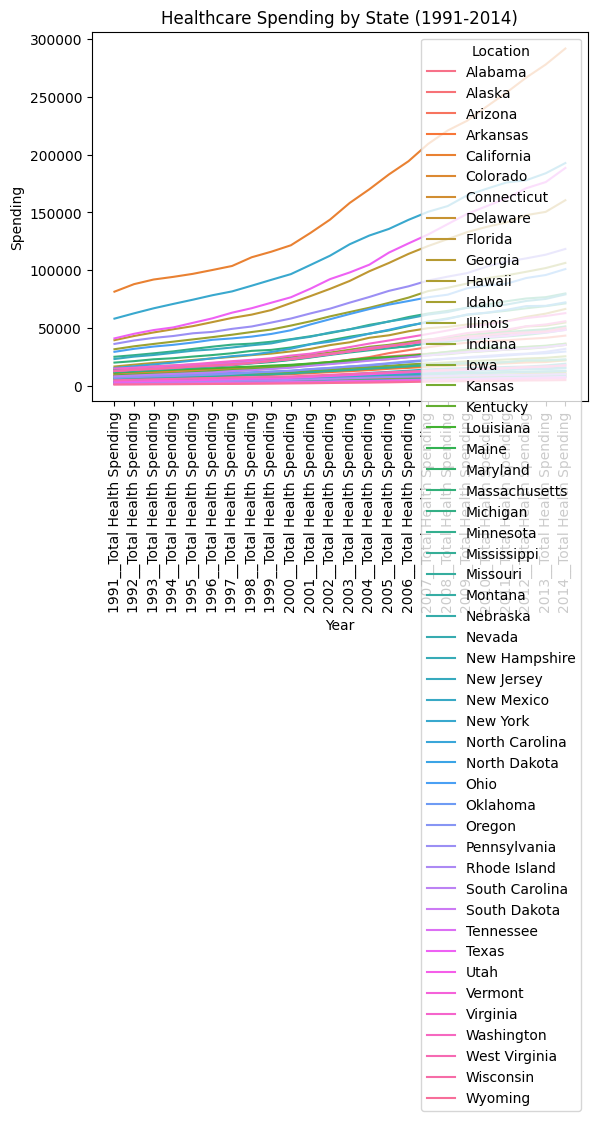

In [14]:
healthcare_df = pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv",skiprows = 2)
mask = healthcare_df['Location'].str.split().str.len() <= 2
filtered_df = healthcare_df[mask]
#print(filtered_df['Location'][-10:])
excl = ['Notes','Sources', 'Definitions', 'United States']
filtered_df = filtered_df[~filtered_df['Location'].isin(excl)]
#print(len(filtered_df))

healthcare_df_long = filtered_df.melt(id_vars = 'Location', var_name = 'Year',value_name = 'Spending')

sns.lineplot(data=healthcare_df_long, x='Year', y='Spending', hue='Location')
plt.title('Healthcare Spending by State (1991-2014)')
plt.xticks(rotation = 90)
plt.show()

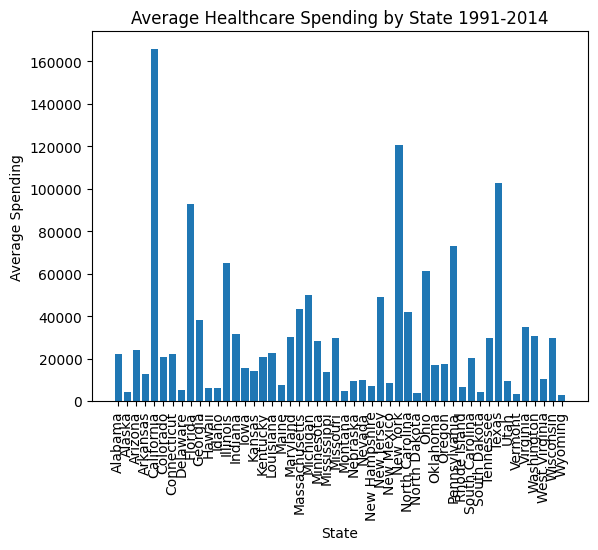

In [15]:
avg_by_st_healthcare_df = healthcare_df_long.groupby(['Location'],as_index = False)['Spending'].mean()

#print(avg_by_st_healthcare_df)

plt.bar(avg_by_st_healthcare_df['Location'], avg_by_st_healthcare_df['Spending'])

# Add labels and a title
plt.xlabel('State')
plt.ylabel('Average Spending')
plt.title('Average Healthcare Spending by State 1991-2014')

plt.xticks(rotation = 90)

# Display the plot
plt.show()
